
Marriage Decision-making using machine learning.
Utilizing machine learning techniques, our project aims to predict marriage compatibility and suitability by analyzing various
relationship factors. By developing a classification model, we provide data-driven decision support for marriage assessment and 
decision-making

I am  going to take the following approach:

Problem Statement: With a growing number of marriages ending in divorce, our objective is to develop a machine learning model that can effectively reduce divorce rates  by providing predictive insights and guidance for marital success with the help of Astrology.

Data Description: The dataset consists of individual records characterized by the zodiac signs and stars of both males and females involved in marriages. Each record includes additional attributes relevant to marriage compatibility and outcomes. By considering the astrological signs and stars, the dataset provides a unique perspective on exploring correlations and patterns related to marital success and compatibility.

Evaluation Approach: The developed machine learning model will be evaluated using a train-test split and performance metrics such as accuracy, precision, recall, and F1-score. Cross-validation and statistical analysis techniques will also be applied to assess the model's generalizability and effectiveness in reducing divorce rates.

Feature Description: The project focuses on six key features that are crucial for marriage compatibility. These features will be weighted to determine their relative importance in predicting marriage outcomes and guiding decision-making processes.

Modelling

Experimentation


Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.


In [11]:
# Import needed tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
# coverting text into numerical data
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

Loading the data

In [12]:
df = pd.read_csv("final_dataset.csv")

In [13]:
df

,femalestar,malestar,femalerasi,malerasi,thinam porutham,kanam porutham,magendhiram porutham,sthirthirgam porutham,yoni porutham,Rasi porutham,rasi adhipathi porutham,vasiyam porutham,raji porutham,vedhai porutham,target
0,aswini,aswini,maesam,mesam,0,1,1,0,1,1,1,0,0,1,0
1,aswini,bharani,maesam,mesam,1,1,0,0,1,1,1,0,1,1,1
2,aswini,karthigai 1 padham,maesam,mesam,0,1,0,0,1,1,1,0,1,1,0
3,aswini,karthigai 2 3 4 padham,maesam,rishabam,0,1,0,0,1,0,1,0,1,1,0
4,aswini,rohini,maesam,rishabam,1,1,1,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,revathi,sathayam,meenam,kumbam,0,1,1,1,1,1,1,0,1,1,1
1292,revathi,pooratadhi 1 2 3 padham,meenam,kumbam,1,1,0,1,0,1,1,0,1,1,1
1293,revathi,pooratadhi 4 padham,meenam,meenam,1,1,0,1,0,1,1,0,1,1,1
1294,revathi,uthiraithadhi,meenam,meenam,1,1,0,1,1,1,1,0,1,1,1


In [14]:
df.isnull().sum()

femalestar                 0
malestar                   0
femalerasi                 0
malerasi                   0
thinam porutham            0
kanam porutham             0
magendhiram porutham       0
sthirthirgam porutham      0
yoni porutham              0
Rasi porutham              0
rasi adhipathi porutham    0
vasiyam porutham           0
raji porutham              0
vedhai porutham            0
target                     0
dtype: int64

In [15]:
#Checling whether the dataset is imbalanced or not
df["target"].value_counts()

0    705
1    591
Name: target, dtype: int64

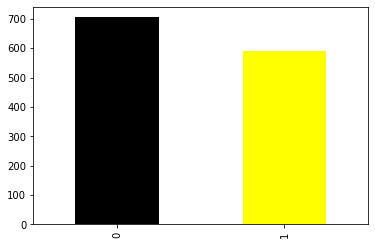

In [16]:
#plotting the datas based on value_counts
df["target"].value_counts().plot(kind = "bar",color = ["Black","yellow"])

In [17]:
#getting the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   femalestar               1296 non-null   object
 1   malestar                 1296 non-null   object
 2   femalerasi               1296 non-null   object
 3   malerasi                 1296 non-null   object
 4   thinam porutham          1296 non-null   int64 
 5   kanam porutham           1296 non-null   int64 
 6   magendhiram porutham     1296 non-null   int64 
 7   sthirthirgam porutham    1296 non-null   int64 
 8   yoni porutham            1296 non-null   int64 
 9   Rasi porutham            1296 non-null   int64 
 10  rasi adhipathi porutham  1296 non-null   int64 
 11  vasiyam porutham         1296 non-null   int64 
 12  raji porutham            1296 non-null   int64 
 13  vedhai porutham          1296 non-null   int64 
 14  target                   1296 non-null  

In [18]:
# Are there any missing values?
df.isna().sum()

femalestar                 0
malestar                   0
femalerasi                 0
malerasi                   0
thinam porutham            0
kanam porutham             0
magendhiram porutham       0
sthirthirgam porutham      0
yoni porutham              0
Rasi porutham              0
rasi adhipathi porutham    0
vasiyam porutham           0
raji porutham              0
vedhai porutham            0
target                     0
dtype: int64

In [19]:
df.describe()

,thinam porutham,kanam porutham,magendhiram porutham,sthirthirgam porutham,yoni porutham,Rasi porutham,rasi adhipathi porutham,vasiyam porutham,raji porutham,vedhai porutham,target
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,0.483025,0.610340,0.215278,0.584877,0.727623,0.408179,0.608796,0.094907,0.777778,0.797068,0.456019
std,0.499905,0.487861,0.411174,0.492934,0.445354,0.491686,0.488208,0.293200,0.415900,0.402338,0.498254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# marriage compatibility based on total_compatibiliy
df.motha_porutham.value_counts()

AttributeError: 'DataFrame' object has no attribute 'motha_porutham'

In [22]:
# Compare target column with total_compatibility column
pd.crosstab(df.target, df.motha_porutham)

AttributeError: 'DataFrame' object has no attribute 'motha_porutham'

In [23]:
# Create a plot of crosstab
pd.crosstab(df.motha_porutham,df.target).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["Black", "yellow"])

plt.title("Marriage Decisoin making")
plt.xlabel("Not_Eligible,Elligible")
plt.ylabel("Total_compaitibility")
plt.legend(["Not_Eligible", "Elligible"]);
plt.xticks(rotation=0);

AttributeError: 'DataFrame' object has no attribute 'motha_porutham'

Male_star vs Female_star for Marriage Eligibilty

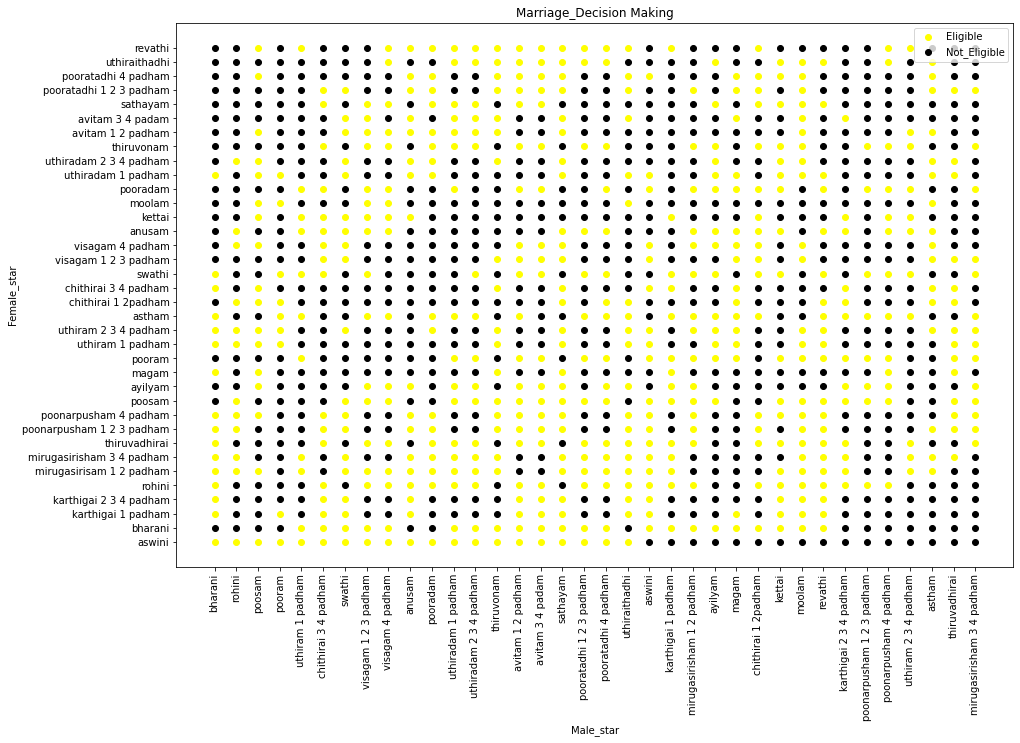

In [24]:
# Creating another plot
plt.figure(figsize=(15,10))

# Scatter with postivie examples
plt.scatter(df.malestar[df.target==1],
            df.femalestar[df.target==1],
            c="Yellow")
plt.xticks(rotation = 90)

# Scatter with negative examples
plt.scatter(df.malestar[df.target==0],
            df.femalestar[df.target==0],
            c="Black")

# Add some helpful info
plt.title("Marriage_Decision Making")
plt.xlabel("Male_star")
plt.ylabel("Female_star")
plt.legend(["Eligible", "Not_Eligible"]);

In [25]:
# Check the distribution of the total_Compatibility column with a histogram
df.motha_porutham.plot.hist(color = "orange");

AttributeError: 'DataFrame' object has no attribute 'motha_porutham'

from the histogram we can see that only if there are minumum of 6 matches they are eligible for marriage

In [26]:
# Make a correlation matrix
df.corr()

,thinam porutham,kanam porutham,magendhiram porutham,sthirthirgam porutham,yoni porutham,Rasi porutham,rasi adhipathi porutham,vasiyam porutham,raji porutham,vedhai porutham,target
thinam porutham,1.000000,0.316396,-0.029167,0.422631,0.404103,0.196289,0.344540,0.092660,0.516673,0.487728,0.531788
kanam porutham,0.316396,1.000000,0.156735,0.364012,0.541820,0.274050,0.387245,0.091386,0.566217,0.623627,0.480608
magendhiram porutham,-0.029167,0.156735,1.000000,0.010742,0.206602,0.118858,0.119812,0.067389,0.158046,0.264283,0.157444
sthirthirgam porutham,0.422631,0.364012,0.010742,1.000000,0.497593,0.505310,0.341837,0.091151,0.634468,0.598923,0.614154
yoni porutham,0.404103,0.541820,0.206602,0.497593,1.000000,0.345898,0.525294,0.150813,0.769418,0.824700,0.487105
Rasi porutham,0.196289,0.274050,0.118858,0.505310,0.345898,1.000000,0.299000,-0.011816,0.353283,0.419042,0.528805
rasi adhipathi porutham,0.344540,0.387245,0.119812,0.341837,0.525294,0.299000,1.000000,0.113924,0.567927,0.621589,0.508558
vasiyam porutham,0.092660,0.091386,0.067389,0.091151,0.150813,-0.011816,0.113924,1.000000,0.160424,0.163392,0.232100
raji porutham,0.516673,0.566217,0.158046,0.634468,0.769418,0.353283,0.567927,0.160424,1.000000,0.934748,0.489401
vedhai porutham,0.487728,0.623627,0.264283,0.598923,0.824700,0.419042,0.621589,0.163392,0.934748,1.000000,0.461984


(11.5, -0.5)

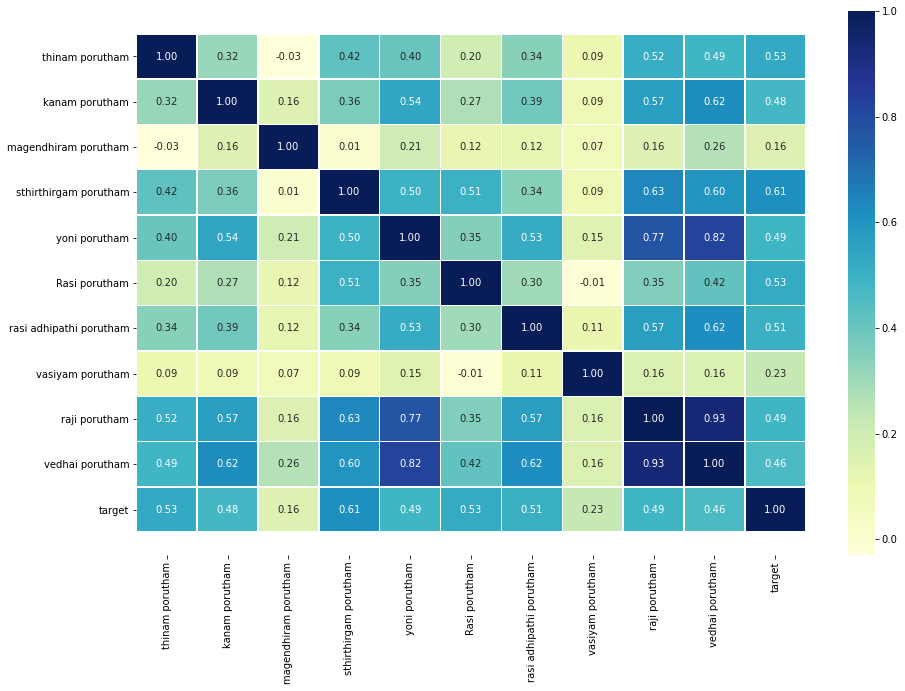

In [27]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Modeling

In [28]:
df.head()

,femalestar,malestar,femalerasi,malerasi,thinam porutham,kanam porutham,magendhiram porutham,sthirthirgam porutham,yoni porutham,Rasi porutham,rasi adhipathi porutham,vasiyam porutham,raji porutham,vedhai porutham,target
0,aswini,aswini,maesam,mesam,0,1,1,0,1,1,1,0,0,1,0
1,aswini,bharani,maesam,mesam,1,1,0,0,1,1,1,0,1,1,1
2,aswini,karthigai 1 padham,maesam,mesam,0,1,0,0,1,1,1,0,1,1,0
3,aswini,karthigai 2 3 4 padham,maesam,rishabam,0,1,0,0,1,0,1,0,1,1,0
4,aswini,rohini,maesam,rishabam,1,1,1,0,1,0,1,0,1,1,1


In [29]:
# splitting the data
x= df.drop(["target"],axis =1)

y = df["target"]

In [30]:
x

,femalestar,malestar,femalerasi,malerasi,thinam porutham,kanam porutham,magendhiram porutham,sthirthirgam porutham,yoni porutham,Rasi porutham,rasi adhipathi porutham,vasiyam porutham,raji porutham,vedhai porutham
0,aswini,aswini,maesam,mesam,0,1,1,0,1,1,1,0,0,1
1,aswini,bharani,maesam,mesam,1,1,0,0,1,1,1,0,1,1
2,aswini,karthigai 1 padham,maesam,mesam,0,1,0,0,1,1,1,0,1,1
3,aswini,karthigai 2 3 4 padham,maesam,rishabam,0,1,0,0,1,0,1,0,1,1
4,aswini,rohini,maesam,rishabam,1,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,revathi,sathayam,meenam,kumbam,0,1,1,1,1,1,1,0,1,1
1292,revathi,pooratadhi 1 2 3 padham,meenam,kumbam,1,1,0,1,0,1,1,0,1,1
1293,revathi,pooratadhi 4 padham,meenam,meenam,1,1,0,1,0,1,1,0,1,1
1294,revathi,uthiraithadhi,meenam,meenam,1,1,0,1,1,1,1,0,1,1


In [31]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1291    1
1292    1
1293    1
1294    1
1295    0
Name: target, Length: 1296, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["femalestar", "malestar", "femalerasi", "malerasi"]

encoders = []
transformed_features = []

for feature in categorical_features:
    encoder = LabelEncoder()
    transformed_feature = encoder.fit_transform(x[feature])
    encoders.append(encoder)
    transformed_features.append(transformed_feature)

transformed_x = x.drop(categorical_features, axis=1)

for i, feature in enumerate(categorical_features):
    transformed_x[feature] = transformed_features[i]




In [33]:
# Getting the test and train data ready
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size = 0.2)

In [34]:
x_train

,thinam porutham,kanam porutham,magendhiram porutham,sthirthirgam porutham,yoni porutham,Rasi porutham,rasi adhipathi porutham,vasiyam porutham,raji porutham,vedhai porutham,femalestar,malestar,femalerasi,malerasi
868,1,0,1,1,1,0,0,0,1,1,15,24,0,8
1052,0,0,0,1,1,0,1,0,1,1,3,16,5,7
1281,1,1,0,1,1,1,1,0,1,1,23,35,6,11
1258,0,0,0,0,0,0,0,0,0,0,31,31,6,5
583,0,0,0,0,0,0,0,0,0,0,1,27,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,0,0,0,0,0,0,0,0,0,0,21,29,6,0
1049,0,0,0,0,0,0,0,0,0,0,3,13,5,8
978,0,1,0,1,1,0,1,0,1,1,30,14,5,7
1074,0,0,0,0,0,0,0,0,0,0,3,4,5,3


In [35]:
# Trying to find the best model
models = (KNeighborsClassifier(),RandomForestClassifier())

In [36]:
names=[]
scores=[]
for i in models :
    # Set random seed
    np.random.seed(42)
    model=i
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    print(str(i),"score=",score)
    names.append(str(i))
    scores.append(score)

KNeighborsClassifier() score= 0.6961538461538461
RandomForestClassifier() score= 0.9961538461538462


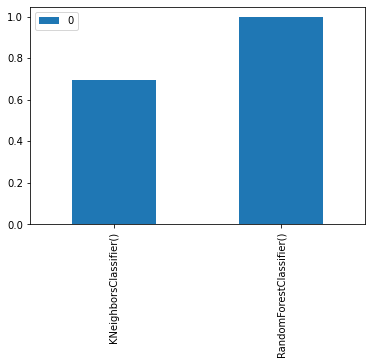

In [37]:
name_score_df = pd.DataFrame(scores, index=names)
name_score_df.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

Hypyterparameter tuning
Feature importance
Confusion matrix
Cross-validation
Precision
Recall
F1 score
Classification report
ROC curve
Area under the curve (AUC)

Hyperparameter tuning (by hand)

In [38]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [39]:
train_scores

[1.0,
 0.8648648648648649,
 0.861003861003861,
 0.8137065637065637,
 0.8001930501930502,
 0.7683397683397684,
 0.7799227799227799,
 0.7664092664092664,
 0.7673745173745173,
 0.7596525096525096,
 0.7586872586872587,
 0.749034749034749,
 0.7451737451737451,
 0.7287644787644788,
 0.7258687258687259,
 0.7335907335907336,
 0.7384169884169884,
 0.7287644787644788,
 0.7374517374517374,
 0.7258687258687259]

In [40]:
test_scores

[0.7269230769230769,
 0.6192307692307693,
 0.7,
 0.6692307692307692,
 0.6961538461538461,
 0.6692307692307692,
 0.6807692307692308,
 0.6692307692307692,
 0.6807692307692308,
 0.6115384615384616,
 0.6461538461538462,
 0.6192307692307693,
 0.6153846153846154,
 0.6076923076923076,
 0.6384615384615384,
 0.6461538461538462,
 0.6307692307692307,
 0.6269230769230769,
 0.6423076923076924,
 0.6307692307692307]

Maximum KNN score on the test data: 72.69%


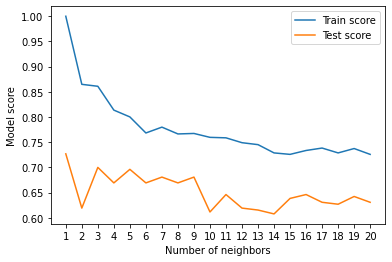

In [41]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

RandomForestClassifier()

... using RandomizedSearchCV

In [42]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [43]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                          refit = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [45]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.9730769230769231

Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

RandomForestClassifier()

... using RandomizedSearchCV

In [46]:
kn_grid = {"n_neighbors": [15,20,25,30,35,40],
           "weights":["uniform","distance"],
           "algorithm": ["ball_tree","kd_tree"],
           "p":[1,2],
           "metric":["euclidean","manhattan","minkowski","chebyshev"],
           "leaf_size": [10,20,30,40,50,60,70,80,90,100]}

In [47]:
kn_grid_2 = {"n_neighbors": [15,20,25,30,35,40],
           "weight":["uniform","distance"],
           "algorithm": ["auto","brute"],
           "p":[1,2],           
           "metric":["euclidean","manhattan","minkowski","chebyshev"]}

In [48]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for KNeighborsClassifier
rs_kn = GridSearchCV(KNeighborsClassifier(), 
                           param_grid=kn_grid,
                           cv=5,
                           verbose=True,
                          refit = True,
                     scoring ="accuracy")

# Fit random hyperparameter search model for RandomForestClassifier()
rs_kn.fit(x_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
rs_kn.best_params_

In [ ]:
rs_kn.score(x_test,y_test)

In [49]:
# Create a hyperparameter grid for RandomForestClassifier
gs_rf_grid = {"n_estimators": [100,50,200],
           "max_depth": [None,1,2],
           "min_samples_split": [1,2],
           "min_samples_leaf": [1]}

In [50]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(), 
                           param_grid=gs_rf_grid,
                           cv=5,
                           verbose=True,
                           refit=True)

# Fit random hyperparameter search model for RandomForestClassifier()
gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Use

C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 765, in

C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 765, in

C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 765, in

C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 765, in

C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 765, in

C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 765, in

C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 765, in

C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Asast\anaconda3\ds\bharani\lib\site-packages\joblib\parallel.py", line 765, in

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 2],
                         'n_estimators': [100, 50, 200]},
             verbose=True)

In [51]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [52]:
gs_rf.score(x_test,y_test)

0.9923076923076923

Evaluting our tuned machine learning classifier, beyond accuracy
ROC curve and AUC score
Confusion matrix
Classification report
Precision
Recall
F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions

In [54]:
# Make predictions with tuned model
y_preds = gs_rf.predict(x_test)

In [55]:
y_preds

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [56]:
y_test

988     1
257     1
527     0
1095    0
724     0
       ..
259     0
331     1
911     1
410     0
532     1
Name: target, Length: 260, dtype: int64

In [58]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_rf, X_test, y_test)

NameError: name 'plot_roc_curve' is not defined

In [59]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[133   1]
 [  1 125]]


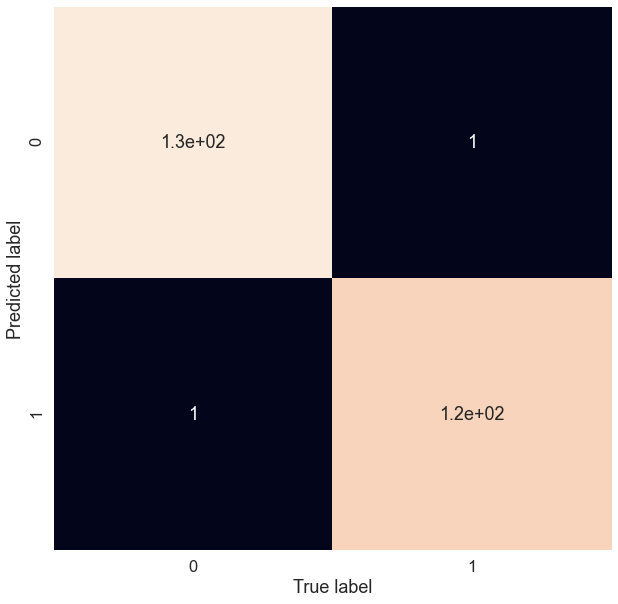

In [65]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated 
precision, recall and f1-score.

In [68]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       134
           1       0.99      0.99      0.99       126

    accuracy                           0.99       260
   macro avg       0.99      0.99      0.99       260
weighted avg       0.99      0.99      0.99       260



Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [69]:
# Check best hyperparameters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [80]:
clf = RandomForestClassifier(n_estimators=100,
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

In [83]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         transformed_x,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([1.        , 0.96923077, 0.96923077, 0.96153846, 0.95384615,
       0.93076923, 0.85271318, 0.85271318, 0.97674419, 1.        ])

In [84]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9466785927251044

In [86]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               transformed_x,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9702739741593497

In [87]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            transformed_x,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9305939324882495

In [88]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         transformed_x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9480423898353869

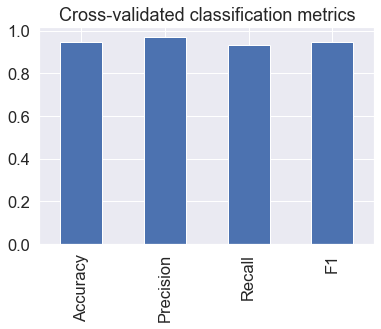

In [89]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model..

In [91]:
# Fit an instance of LogisticRegression
clf = RandomForestClassifier(n_estimators=100,
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

clf.fit(x_train, y_train);

In [92]:
# Check coef_
clf.coef_

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'